In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
abdose_adult = pd.read_excel('2017-06-28_ABDoseAdult_MW-v4.xlsx', sheetname='ABDoseAdult_copy')

In [3]:
df_sample = abdose_adult
df_sample.head()

,record_id,age,sex,height,weight,ethnicity,abdose_abx_1___1,abdose_abx_1___2,abdose_abx_1___3,abdose_abx_1___4,...,sample8_abx5_other_vpress,sample8_abx5_dose_vpress,sample8_abx5_vpress2_yn,sample8_abx5_vpress2,sample8_abx5_other_vpress2,sample8_abx5_dose_vpress2,additional_notes,notes_complete,apache,apache_score_complete
0,A001,60.5,1,160.0,48.2,10.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14.0,2
1,A002,75.5,1,166.0,70.0,3.0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,21.0,2
2,A003,61.3,0,192.0,120.0,10.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Patient discharged 05/3/15 but readmitted to I...,2,24.0,2
3,A004,45.9,0,170.0,127.0,3.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,16.0,2
4,A005,83.7,1,154.0,81.0,6.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,24.0,2


In [4]:
df_crp_48 = pd.concat([df_sample['icuadmin_crp'], df_sample['hospadmin_crp']], axis=1)
df_crp_48 = pd.concat([df_crp_48, df_sample['baseline_crp']], axis=1)
df_crp_48 = pd.concat([df_crp_48, df_sample['sd1_crp']], axis=1)
df_crp_48 = pd.concat([df_crp_48, df_sample['sd2_crp']], axis=1)
df_crp_48 = pd.concat([df_crp_48, df_sample['sd3_crp']], axis=1)
df_crp_48 = pd.concat([df_crp_48, df_sample['fu48_crp']], axis=1)

In [5]:
df_crp_48.head()

,icuadmin_crp,hospadmin_crp,baseline_crp,sd1_crp,sd2_crp,sd3_crp,fu48_crp
0,339.8,33.5,NaN,177.3,133.0,NaN,108.6
1,242.3,NaN,NaN,105.1,111.2,NaN,29.6
2,41.4,41.4,NaN,69.3,69.9,NaN,21.2
3,66.6,30.2,13.0,92.5,110.0,NaN,NaN
4,51.0,9.1,NaN,115.3,115.3,NaN,110.3


In [6]:
df_wcc_48 = pd.concat([df_sample['icuadmin_wcc'], df_sample['hospadmin_wcc']], axis=1)
df_wcc_48 = pd.concat([df_wcc_48, df_sample['baseline_wcc']], axis=1)
df_wcc_48 = pd.concat([df_wcc_48, df_sample['sd1_wcc']], axis=1)
df_wcc_48 = pd.concat([df_wcc_48, df_sample['sd2_wcc']], axis=1)
df_wcc_48 = pd.concat([df_wcc_48, df_sample['sd3_wcc']], axis=1)
df_wcc_48 = pd.concat([df_wcc_48, df_sample['fu48_wcc']], axis=1)

In [7]:
df_wcc_48.head()

,icuadmin_wcc,hospadmin_wcc,baseline_wcc,sd1_wcc,sd2_wcc,sd3_wcc,fu48_wcc
0,8.1,12.7,8.4,19.4,13.8,NaN,14.0
1,25.0,NaN,NaN,13.3,14.8,NaN,10.8
2,27.6,31.8,5.1,17.2,15.0,NaN,9.2
3,14.9,9.2,3.8,14.7,19.8,NaN,NaN
4,8.8,5.1,NaN,11.1,11.1,NaN,12.5


In [8]:
df_hi_temp_48 = pd.concat([df_sample['highest_temp_admission'], df_sample['sd1_hi_temp']], axis=1)
df_hi_temp_48 = pd.concat([df_hi_temp_48, df_sample['sd2_hi_temp']], axis=1)
df_hi_temp_48 = pd.concat([df_hi_temp_48, df_sample['sd3_hi_temp']], axis=1)
df_hi_temp_48 = pd.concat([df_hi_temp_48, df_sample['fu48_hi_temp']], axis=1)

In [9]:
df_hi_temp_48.head()

,highest_temp_admission,sd1_hi_temp,sd2_hi_temp,sd3_hi_temp,fu48_hi_temp
0,37.2,37.4,37.0,NaN,36.0
1,37.3,37.2,37.6,NaN,37.3
2,37.3,36.8,37.1,NaN,36.8
3,37.9,37.0,36.8,NaN,NaN
4,36.5,37.1,36.5,NaN,36.9


In [10]:
frames = [df_crp_48, df_wcc_48, df_hi_temp_48, df_sample['apache'], df_sample['fu48_clinical_outcome']]
df_try_48 = pd.concat(frames, axis=1)

In [11]:
df_try_48.head()

,icuadmin_crp,hospadmin_crp,baseline_crp,sd1_crp,sd2_crp,sd3_crp,fu48_crp,icuadmin_wcc,hospadmin_wcc,baseline_wcc,...,sd2_wcc,sd3_wcc,fu48_wcc,highest_temp_admission,sd1_hi_temp,sd2_hi_temp,sd3_hi_temp,fu48_hi_temp,apache,fu48_clinical_outcome
0,339.8,33.5,NaN,177.3,133.0,NaN,108.6,8.1,12.7,8.4,...,13.8,NaN,14.0,37.2,37.4,37.0,NaN,36.0,14.0,1
1,242.3,NaN,NaN,105.1,111.2,NaN,29.6,25.0,NaN,NaN,...,14.8,NaN,10.8,37.3,37.2,37.6,NaN,37.3,21.0,2
2,41.4,41.4,NaN,69.3,69.9,NaN,21.2,27.6,31.8,5.1,...,15.0,NaN,9.2,37.3,36.8,37.1,NaN,36.8,24.0,2
3,66.6,30.2,13.0,92.5,110.0,NaN,NaN,14.9,9.2,3.8,...,19.8,NaN,NaN,37.9,37.0,36.8,NaN,NaN,16.0,4
4,51.0,9.1,NaN,115.3,115.3,NaN,110.3,8.8,5.1,NaN,...,11.1,NaN,12.5,36.5,37.1,36.5,NaN,36.9,24.0,1


In [12]:
for column in df_try_48:
    mv_pct = df_try_48[column].isnull().sum()/len(df_try_48)
    print(column)
    print(mv_pct)

icuadmin_crp
0.145833333333
hospadmin_crp
0.472222222222
baseline_crp
0.784722222222
sd1_crp
0.284722222222
sd2_crp
0.277777777778
sd3_crp
0.902777777778
fu48_crp
0.298611111111
icuadmin_wcc
0.00694444444444
hospadmin_wcc
0.388888888889
baseline_wcc
0.631944444444
sd1_wcc
0.208333333333
sd2_wcc
0.256944444444
sd3_wcc
0.895833333333
fu48_wcc
0.298611111111
highest_temp_admission
0.0347222222222
sd1_hi_temp
0.208333333333
sd2_hi_temp
0.263888888889
sd3_hi_temp
0.902777777778
fu48_hi_temp
0.305555555556
apache
0.0208333333333
fu48_clinical_outcome
0.0


In [13]:
df_try_48['icuadmin_crp'] = df_try_48['icuadmin_crp'].fillna(df_try_48['icuadmin_crp'].median())
df_try_48['sd1_crp'] = df_try_48['sd1_crp'].fillna(df_try_48['sd1_crp'].median())
df_try_48['sd2_crp'] = df_try_48['sd2_crp'].fillna(df_try_48['sd2_crp'].median())
df_try_48['fu48_crp'] = df_try_48['fu48_crp'].fillna(df_try_48['fu48_crp'].median())

df_try_48['icuadmin_wcc'] = df_try_48['icuadmin_wcc'].fillna(df_try_48['icuadmin_wcc'].median())
df_try_48['sd1_wcc'] = df_try_48['sd1_wcc'].fillna(df_try_48['sd1_wcc'].median())
df_try_48['sd2_wcc'] = df_try_48['sd2_wcc'].fillna(df_try_48['sd2_wcc'].median())
df_try_48['fu48_wcc'] = df_try_48['fu48_wcc'].fillna(df_try_48['fu48_wcc'].median())

df_try_48['highest_temp_admission'] = df_try_48['highest_temp_admission'].fillna(df_try_48['highest_temp_admission'].median())
df_try_48['sd1_hi_temp'] = df_try_48['sd1_hi_temp'].fillna(df_try_48['sd1_hi_temp'].median())
df_try_48['sd2_hi_temp'] = df_try_48['sd2_hi_temp'].fillna(df_try_48['sd2_hi_temp'].median())
df_try_48['fu48_hi_temp'] = df_try_48['fu48_hi_temp'].fillna(df_try_48['fu48_hi_temp'].median())

df_try_48['apache'] = df_try_48['apache'].fillna(df_try_48['apache'].median())

In [14]:
cols = ['icuadmin_crp',
        'sd1_crp',
        'sd2_crp',
        'fu48_crp',
        'icuadmin_wcc',
        'sd1_wcc',
        'sd2_wcc',
        'fu48_wcc',
        'highest_temp_admission',
        'sd1_hi_temp',
        'sd2_hi_temp',
        'fu48_hi_temp',
        'apache',
        'fu48_clinical_outcome']

In [15]:
df_try_48['fu48_clinical_outcome'] = df_try_48['fu48_clinical_outcome'].replace(2,0)
df_try_48['fu48_clinical_outcome'] = df_try_48['fu48_clinical_outcome'].replace(3,0)
df_try_48['fu48_clinical_outcome'] = df_try_48['fu48_clinical_outcome'].replace(4,0)

In [16]:
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
X = df_try_48[cols]
X = X.drop(['fu48_clinical_outcome'], axis=1)
Y = df_try_48['fu48_clinical_outcome']
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [18]:
# SVM
svm_clf = svm.SVC(C=1.0, 
              cache_size=200, 
              class_weight=None, 
              coef0=0.0,
              decision_function_shape=None, 
              degree=3, 
              gamma='auto', 
              kernel='rbf',
              max_iter=-1, 
              probability=False, 
              random_state=None, 
              shrinking=True,
              tol=0.001, 
              verbose=False)
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
y_pred = svm_clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.50%


In [20]:
# Logistic regression
xgb_clf = XGBClassifier(base_score=0.5, 
                       colsample_bylevel=1, 
                       colsample_bytree=1,
                       gamma=0, 
                       learning_rate=0.1, 
                       max_delta_step=0, 
                       max_depth=3,
                       min_child_weight=1, 
                       missing=None, 
                       n_estimators=100, 
                       nthread=-1,
                       objective='binary:logistic', 
                       reg_alpha=100, 
                       reg_lambda=1,
                       scale_pos_weight=1, 
                       seed=0, 
                       silent=True, 
                       subsample=1)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=100, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [21]:
y_pred = xgb_clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.50%


In [22]:
# Random forest
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            max_depth=None, 
                            max_features='auto', 
                            max_leaf_nodes=None,
                            min_impurity_split=1e-07, 
                            min_samples_leaf=1,
                            min_samples_split=2, 
                            min_weight_fraction_leaf=0.0,
                            n_estimators=100, 
                            n_jobs=1, 
                            oob_score=False, 
                            random_state=None,
                            verbose=0, warm_start=False)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [23]:
y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 39.58%


In [26]:
# Naive Bayes
nb_clf = GaussianNB()
nb_clf.partial_fit(X_train, y_train, np.unique(y_train))

GaussianNB(priors=None)

In [27]:
y_pred = nb_clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 47.92%


In [31]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [32]:
model_ridge = Ridge()

In [33]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

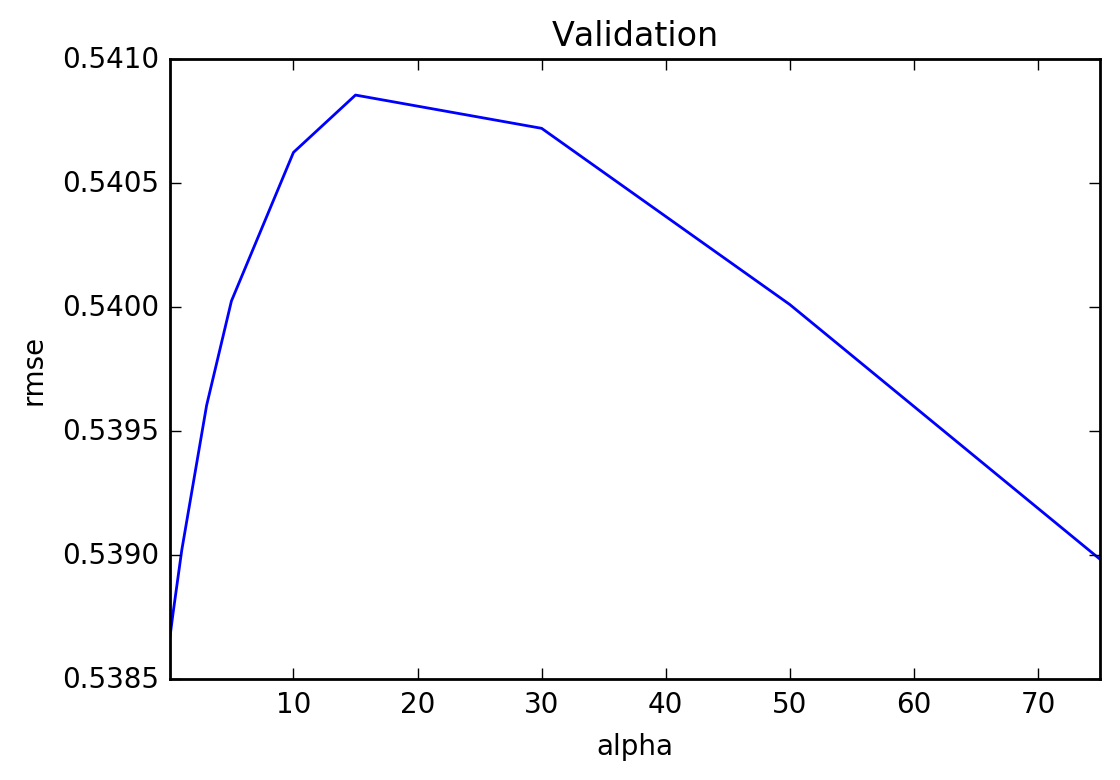

In [38]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")